# Time Series Forecasting with LSTM

This notebook implements LSTM (Long Short-Term Memory) for time series forecasting using the airline passengers dataset.

## What is Time Series Forecasting?
Time series forecasting is a technique for predicting events through a time sequence. It analyzes trends from the past, assuming that future trends will hold similar to historical trends.

## What is LSTM?
LSTM stands for Long Short-Term Memory. It is a model that extends the memory of recurrent neural networks, allowing them to use persistent past information for current predictions.

## Step 1: Import Required Libraries

In [2]:
pip install pandas numpy matplotlib scikit-learn tensorflow

  Using cached scikit_learn-1.7.2-cp312-cp312-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached scikit_learn-1.7.2-cp312-cp312-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/10.7 MB ? eta -:--:--Requirement already satisfied: markdown>=2.6.8 in ./.venv/lib/python3.12/site-packages (from tensorboard<2.18,>=2.17->tensorflow) (3.7)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 22.7 MB/s eta 0:00:00 0:00:01
Using ca

In [3]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Fix random seed for reproducibility
numpy.random.seed(7)

## Step 2: Load and Prepare the Dataset

We'll download the airline passengers dataset and prepare it for LSTM training.

In [4]:
# Load the dataset from URL
url = 'https://raw.githubusercontent.com/amankharwal/Website-data/master/airline-passengers.csv'
dataframe = pandas.read_csv(url, usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# Normalize the dataset to range (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

print(f"Dataset shape: {dataset.shape}")
print(f"First 5 values: {dataset[:5].flatten()}")

Dataset shape: (144, 1)
First 5 values: [0.01544401 0.02702703 0.05405405 0.04826255 0.03281853]


## Step 3: Split into Training and Test Sets

We'll use 67% of data for training and 33% for testing.

In [5]:
# Split into train and test sets (67% train, 33% test)
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

print(f"Training set size: {len(train)}")
print(f"Test set size: {len(test)}")

Training set size: 96
Test set size: 48


## Step 4: Create Dataset Helper Function

This function converts an array of values into a dataset matrix where X is the input and Y is the output (next value).

In [6]:
# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

## Step 5: Reshape Data for LSTM

LSTM expects input in the shape [samples, time steps, features].

In [7]:
# Reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

print(f"Training X shape: {trainX.shape}")
print(f"Training Y shape: {trainY.shape}")
print(f"Test X shape: {testX.shape}")
print(f"Test Y shape: {testY.shape}")

Training X shape: (94, 1, 1)
Training Y shape: (94,)
Test X shape: (46, 1, 1)
Test Y shape: (46,)


## Step 6: Create and Train the LSTM Model

We'll build a simple LSTM network with 4 LSTM units.

In [8]:
# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history = model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

print("\nModel training completed!")

Epoch 1/100


/Applications/CODES/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 - 0s - 5ms/step - loss: 0.0586
Epoch 2/100
94/94 - 0s - 340us/step - loss: 0.0289
Epoch 3/100
94/94 - 0s - 306us/step - loss: 0.0218
Epoch 4/100
94/94 - 0s - 285us/step - loss: 0.0199
Epoch 5/100
94/94 - 0s - 343us/step - loss: 0.0191
Epoch 6/100
94/94 - 0s - 293us/step - loss: 0.0176
Epoch 7/100
94/94 - 0s - 336us/step - loss: 0.0165
Epoch 8/100
94/94 - 0s - 387us/step - loss: 0.0154
Epoch 9/100
94/94 - 0s - 362us/step - loss: 0.0144
Epoch 10/100
94/94 - 0s - 363us/step - loss: 0.0132
Epoch 11/100
94/94 - 0s - 375us/step - loss: 0.0122
Epoch 12/100
94/94 - 0s - 351us/step - loss: 0.0110
Epoch 13/100
94/94 - 0s - 338us/step - loss: 0.0101
Epoch 14/100
94/94 - 0s - 359us/step - loss: 0.0091
Epoch 15/100
94/94 - 0s - 364us/step - loss: 0.0081
Epoch 16/100
94/94 - 0s - 373us/step - loss: 0.0071
Epoch 17/100
94/94 - 0s - 383us/step - loss: 0.0063
Epoch 18/100
94/94 - 0s - 343us/step - loss: 0.0054
Epoch 19/100
94/94 - 0s - 349us/step - loss: 0.0047
Epoch 20/100
94/94 - 0s - 356us/ste

## Step 7: Make Predictions and Evaluate

Now we'll make predictions on both training and test data, then calculate the RMSE (Root Mean Squared Error).

In [9]:
# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions back to original scale
trainPredict = scaler.inverse_transform(trainPredict)
trainY_inv = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY_inv = scaler.inverse_transform([testY])

# Calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY_inv[0], trainPredict[:, 0]))
testScore = math.sqrt(mean_squared_error(testY_inv[0], testPredict[:, 0]))

print(f'Train Score: {trainScore:.2f} RMSE')
print(f'Test Score: {testScore:.2f} RMSE')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step
Train Score: 22.82 RMSE
Test Score: 50.59 RMSE


## Step 8: Visualize Results

Finally, let's plot the baseline dataset along with our predictions for both training and test data.

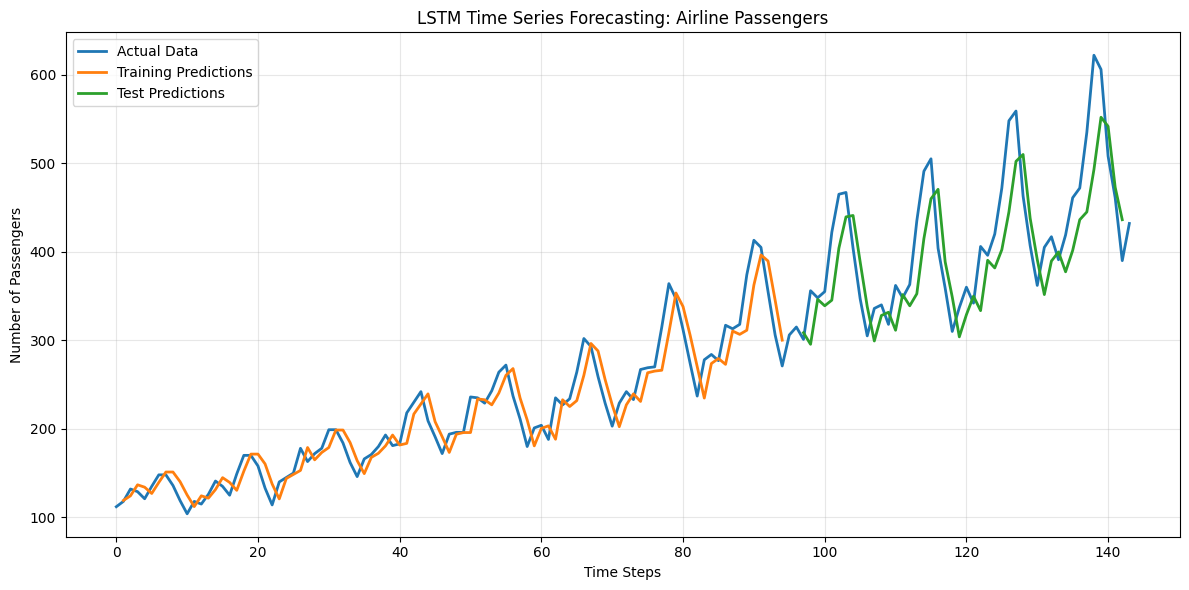

In [10]:
# Shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict

# Shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict) + (look_back * 2) + 1:len(dataset) - 1, :] = testPredict

# Plot baseline and predictions
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(dataset), label='Actual Data', linewidth=2)
plt.plot(trainPredictPlot, label='Training Predictions', linewidth=2)
plt.plot(testPredictPlot, label='Test Predictions', linewidth=2)
plt.xlabel('Time Steps')
plt.ylabel('Number of Passengers')
plt.title('LSTM Time Series Forecasting: Airline Passengers')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Summary

This notebook demonstrated:
1. **Data Loading**: Loaded the airline passengers dataset from a remote URL
2. **Data Preprocessing**: Normalized the data using MinMaxScaler for better LSTM performance
3. **Data Splitting**: Split data into 67% training and 33% testing sets
4. **LSTM Model**: Built a simple LSTM network with 4 units
5. **Training**: Trained the model for 100 epochs
6. **Evaluation**: Calculated RMSE for both training and test predictions
7. **Visualization**: Plotted the actual data vs predictions

The LSTM model successfully learns the time series patterns and can make reasonable forecasts for future values!